Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

Loading Data

In [2]:
df=pd.read_csv('../datasets/Crop_recommendation.csv')

In [3]:
df.head()

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Data Processing

In [5]:
df=df.dropna()

In [6]:
df.head()

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

Visualization

In [8]:
unique_elements=df['label'].unique()
abbreviation=[i[:5] for i in unique_elements]
print(unique_elements)
print(abbreviation)
x=df.drop('label',axis=1)
y=df['label']

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
['rice', 'maize', 'chick', 'kidne', 'pigeo', 'mothb', 'mungb', 'black', 'lenti', 'pomeg', 'banan', 'mango', 'grape', 'water', 'muskm', 'apple', 'orang', 'papay', 'cocon', 'cotto', 'jute', 'coffe']


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'chickpea'),
  Text(3, 0, 'kidneybeans'),
  Text(4, 0, 'pigeonpeas'),
  Text(5, 0, 'mothbeans'),
  Text(6, 0, 'mungbean'),
  Text(7, 0, 'blackgram'),
  Text(8, 0, 'lentil'),
  Text(9, 0, 'pomegranate'),
  Text(10, 0, 'banana'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'grapes'),
  Text(13, 0, 'watermelon'),
  Text(14, 0, 'muskmelon'),
  Text(15, 0, 'apple'),
  Text(16, 0, 'orange'),
  Text(17, 0, 'papaya'),
  Text(18, 0, 'coconut'),
  Text(19, 0, 'cotton'),
  Text(20, 0, 'jute'),
  Text(21, 0, 'coffee')])

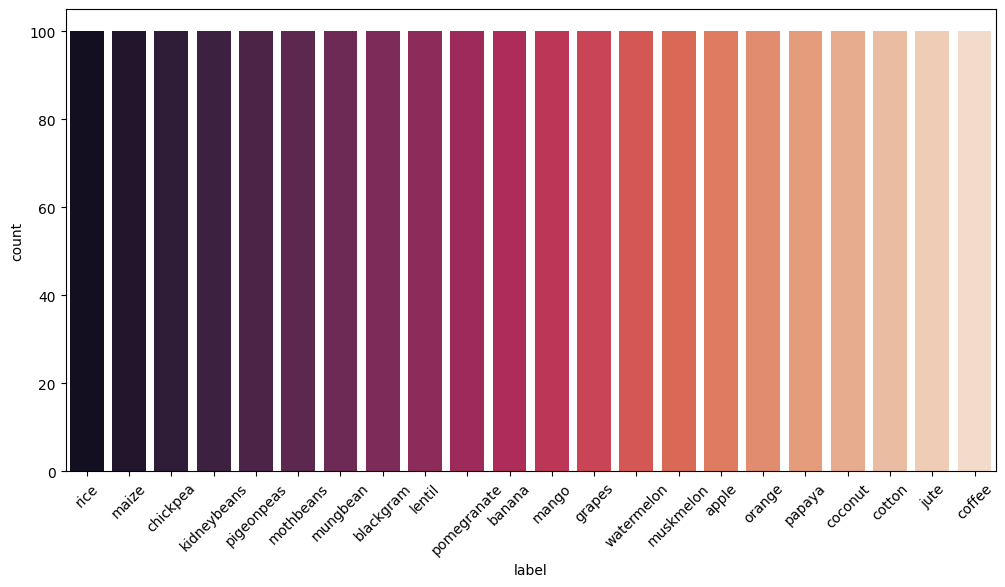

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['label'],palette='rocket',hue=y)
plt.xticks(rotation=45)

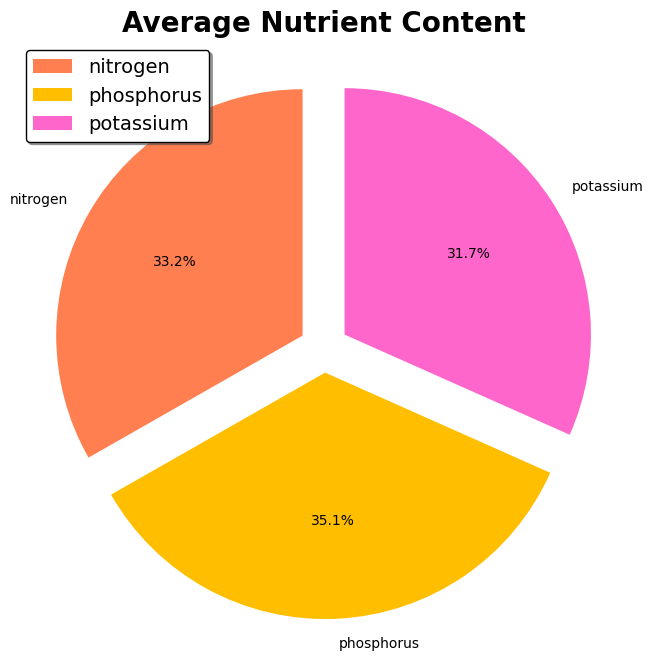

In [10]:
colors = ['#FF7F50', '#FFBF00', '#FF66CC']

fig, ax = plt.subplots(figsize = (8, 8))
nutrients = ['nitrogen', 'phosphorus', 'potassium']
sizes = [df['nitrogen'].mean(), df['phosphorus'].mean(), df['potassium'].mean()]

explode = [0.1, 0.1, 0.1]
ax.pie(sizes, labels = nutrients, colors = colors, autopct = '%1.1f%%', startangle = 90, explode = explode)
ax.set_title('Average Nutrient Content', fontsize = 20, fontweight = 'bold')
ax.legend(fontsize = 14, loc = 'best', edgecolor = 'black', shadow = True)

plt.show()

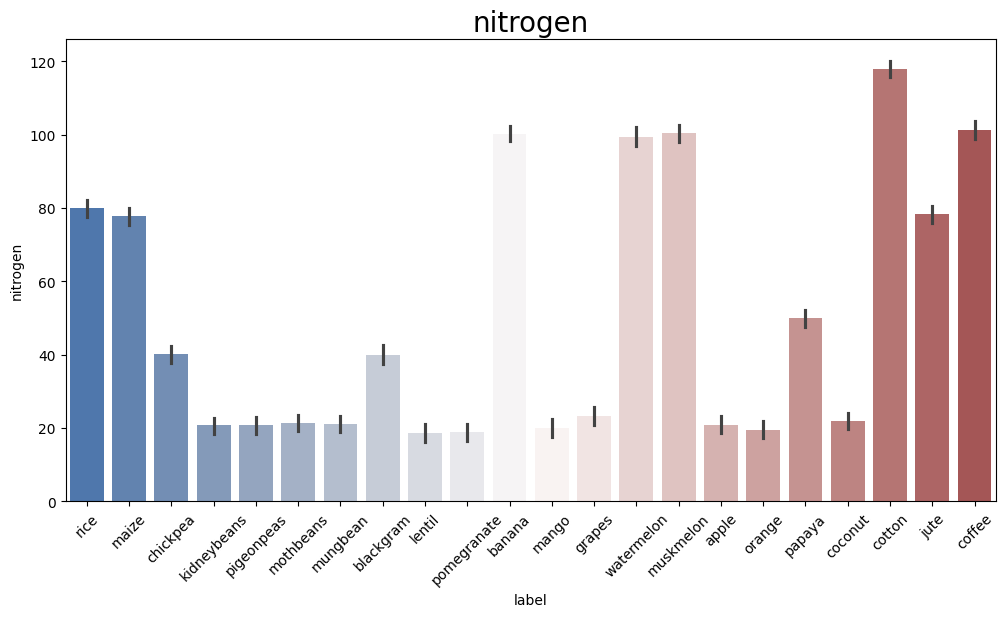

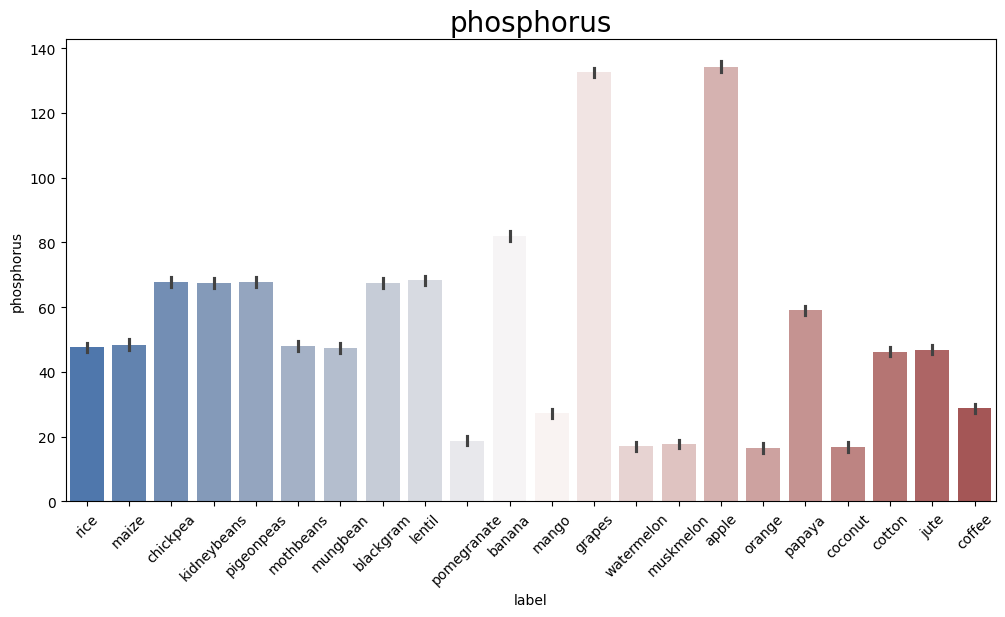

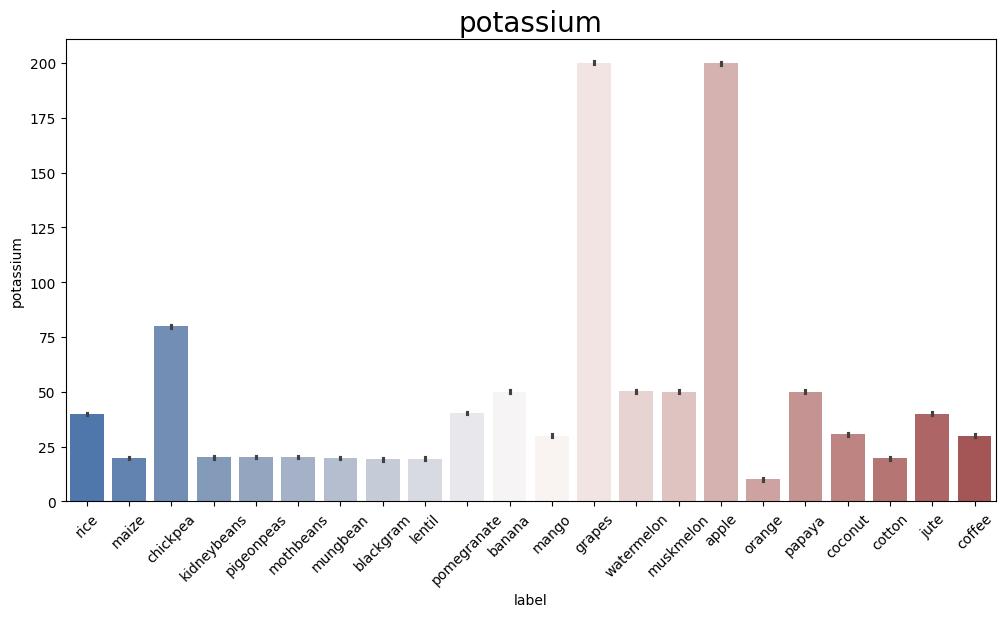

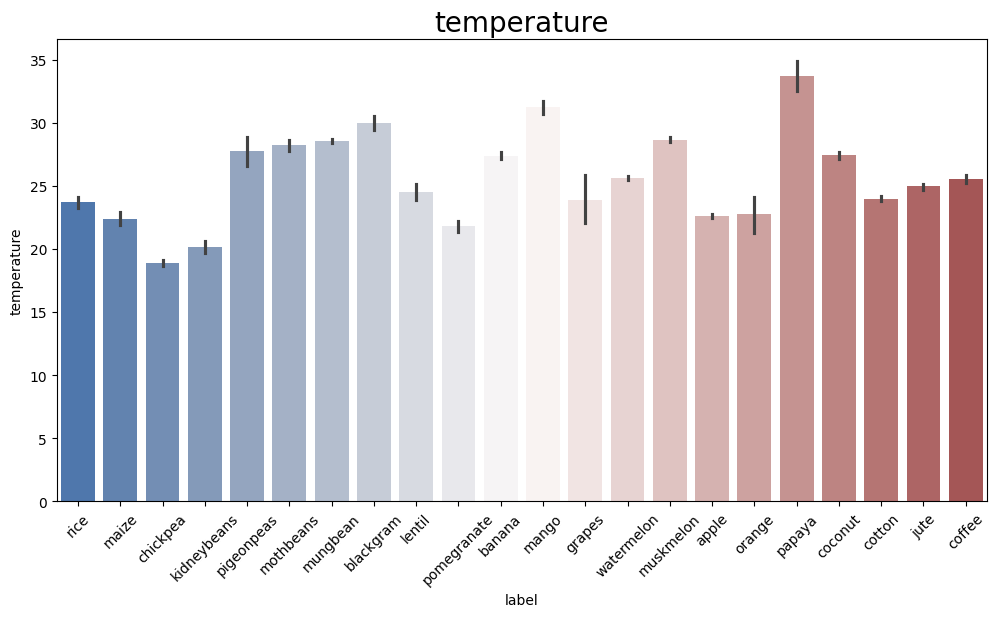

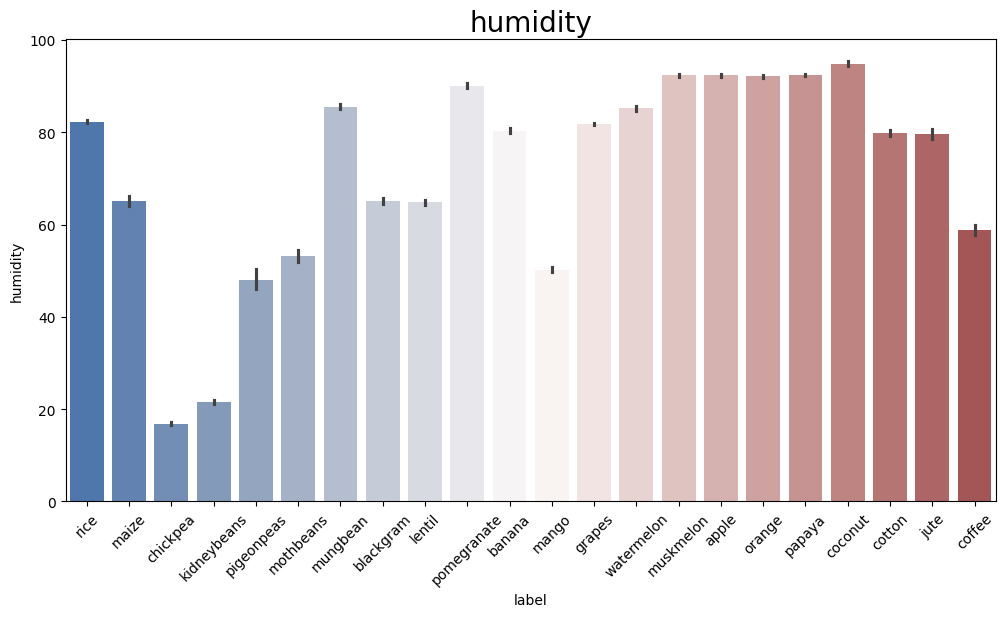

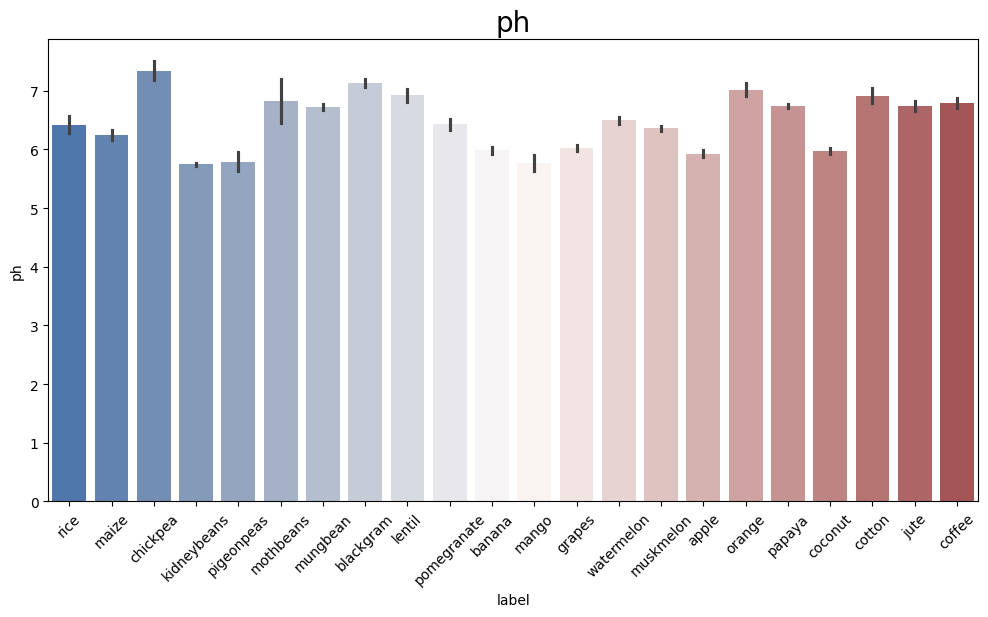

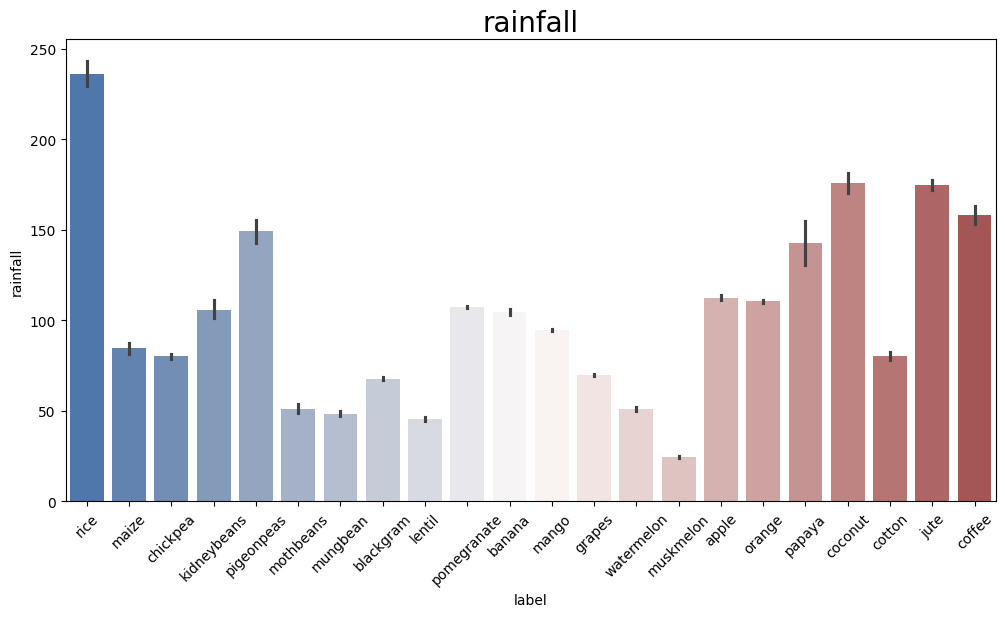

In [11]:
columns=df.select_dtypes(include=['float64','int64']).columns

for col in columns:
  plt.figure(figsize=(12,6))
  plt.title(col,fontsize=20)
  sns.barplot(x='label',y=col,palette='vlag',hue=y,data=df)
  plt.xticks(rotation=45)

 Split Train/Test

In [12]:
x=df.drop('label',axis=1)
y=df['label']

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=0)

Training Model

In [13]:
RFC = RandomForestClassifier(max_features='sqrt', min_samples_leaf=1, min_samples_split=2, random_state=0)
RFC.fit(x_train, y_train)
y_pred = RFC.predict(x_test)


In [14]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)

Accuracy: 0.9977272727272727


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.95      1.00      0.98        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

Saving the Model

In [16]:
import pickle
with open('../trained_models/Crop_Recommendation.pkl','wb') as file:
  pickle.dump(RFC,file)